# Máquinas de Vetores de Suporte

## Classificação Linear da SVM

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

In [217]:
iris = datasets.load_iris()

In [237]:
x = iris.data
y = iris.target

In [238]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [239]:
svm_clr = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

In [240]:
svm_clr.fit(x_train, y_train)

C:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [242]:
svm_clr.score(x_test, y_test)

0.8666666666666667

In [243]:
df = pd.DataFrame(iris.data)
df_target = pd.DataFrame(iris.target)

In [244]:
new_df = pd.concat([df, df_target], axis=1)

In [245]:
df.shape

(150, 4)

In [246]:
df_target.shape

(150, 1)

In [247]:
new_df.shape

(150, 5)

In [248]:
new_df.columns = [0, 1, 2, 3, "target"]

In [249]:
new_df.head()

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


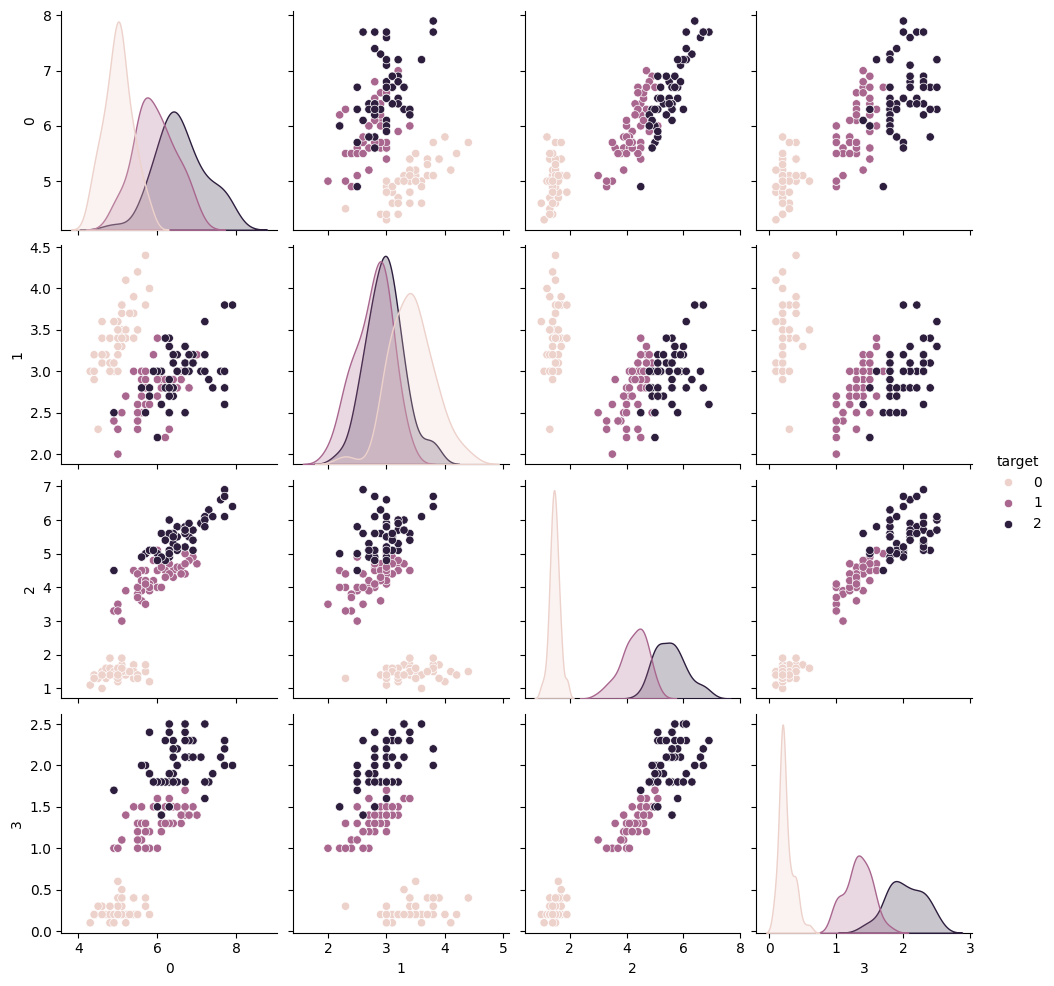

In [250]:
sns.pairplot(data=new_df, hue='target');

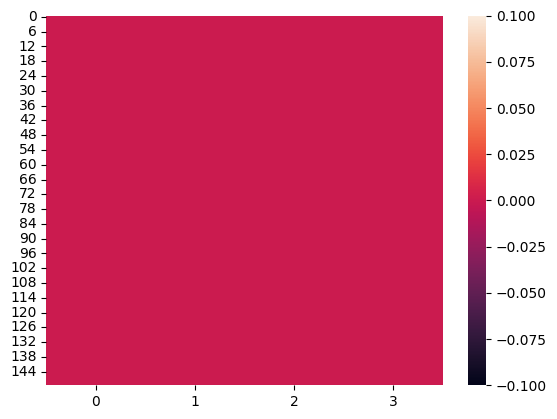

In [45]:
sns.heatmap(df.isnull());

In [46]:
new_df.to_csv("data/iris_data.csv")

## SVM não linear

In [50]:
from sklearn.preprocessing import PolynomialFeatures

In [198]:
x, y = datasets.make_moons(n_samples=10000, noise=0.3)

In [199]:
df = pd.concat([pd.DataFrame(x), pd.DataFrame(y)], axis=1)
df.columns = [0, 1, "target"]
df.head()

,0,1,target
0,0.180373,0.703985,0
1,1.097867,-0.632161,1
2,2.005729,-0.412370,1
3,-0.711329,0.533321,0
4,0.331325,-0.073853,1


In [200]:
df.shape

(10000, 3)

In [201]:
x.shape

(10000, 2)

In [202]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [203]:
pol_svm = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss="hinge"))
])

In [204]:
pol_svm.fit(x_train, y_train)

C:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=10)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [205]:
pol_svm.score(x_test, y_test)

0.9115

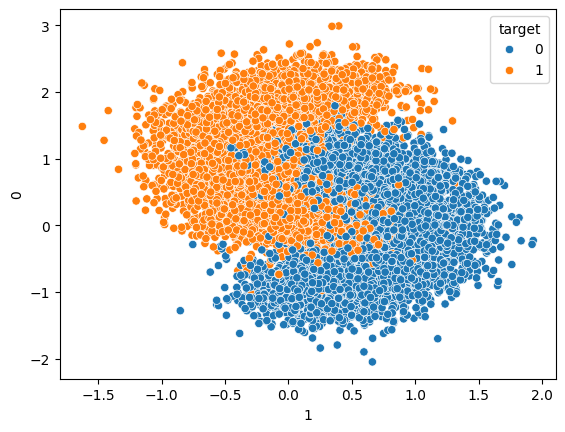

In [206]:
sns.scatterplot(data=df, x=1, y=0, hue="target");

In [207]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [208]:
y_pred = pol_svm.predict(x_test)
accuracy_score(y_pred, y_test)

0.9115

In [209]:
confusion_matrix(y_pred, y_test)

array([[915,  87],
       [ 90, 908]], dtype=int64)

In [214]:
from sklearn.svm import SVC, SVR

In [211]:
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('smv_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])

In [212]:
poly_kernel_svm_clf.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('smv_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [213]:
poly_kernel_svm_clf.score(x_test, y_test)

0.9185

In [215]:
svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(x_train, y_train)

SVR(C=100, degree=2, kernel='poly')

In [216]:
svm_poly_reg.score(x_test, y_test)

0.2595459501255334